<a href="https://colab.research.google.com/github/marycia624/ComputerVision/blob/main/Human_verification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dlib
from skimage import io
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [ ]:

sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

Загружу фото из паспорта

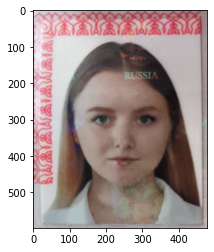

In [ ]:
img = io.imread('pas.jpg')
plt.imshow(img)

К сожалению, в google colab невозможно использовать библиотеку для открисовки ключевых точек лица, но зато можно рассчитать эвклидово растояние


In [ ]:
dets = detector(img, 1)

In [ ]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)

Detection 0: Left: 111 Top: 231 Right: 379 Bottom: 498


In [ ]:
face_descriptor1 = facerec.compute_face_descriptor(img, shape)

In [ ]:
print(face_descriptor1)

-0.121906
0.000671627
0.0476306
-0.216218
-0.120315
0.0674624
-0.00568045
-0.032979
0.171459
-0.133425
0.142275
-0.0614542
-0.206199
-0.0225725
0.0414542
0.196389
-0.199175
-0.182436
-0.0697036
-0.0676222
0.0452083
0.113551
-0.0956416
0.0677382
-0.18718
-0.329206
-0.0133369
-0.0514895
-0.0415033
-0.0205133
0.11872
0.181742
-0.174725
0.0356048
0.0341369
0.0862617
-0.0098153
-0.171526
0.19952
0.0979901
-0.301259
-0.0630396
0.131724
0.250442
0.167037
-0.0437468
-0.0106782
0.0249645
0.158175
-0.360765
-0.0311906
0.170658
0.0511941
0.0349128
0.0736609
-0.119152
0.102247
0.0531287
-0.23829
-0.0224972
0.0724002
-0.125608
0.0100427
-0.117871
0.146532
0.0683115
-0.0858912
-0.164334
0.132635
-0.121041
-0.110119
0.12027
-0.168608
-0.182841
-0.280592
0.002161
0.262737
0.186296
-0.116991
0.0408425
0.00870361
-0.015282
0.0851818
0.158496
0.077309
-0.067294
-0.0179412
0.0277213
0.249775
-0.0196617
-0.00481022
0.290307
0.0433833
-0.0821625
-0.0706709
0.0386633
-0.0664502
0.0329233
-0.0774355
0.0283647

Detection 0: Left: 98 Top: 170 Right: 419 Bottom: 491


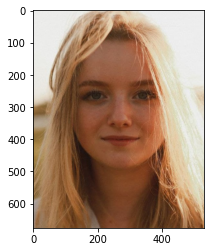

In [ ]:
img = io.imread('me1.jpg')
plt.imshow(img)
dets_webcam = detector(img, 1)
for k, d in enumerate(dets_webcam):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)

In [ ]:
face_descriptor2 = facerec.compute_face_descriptor(img, shape)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

0.4958247994513461


Меня не узнали(((

Detection 0: Left: 245 Top: 297 Right: 707 Bottom: 759


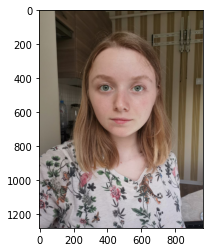

In [ ]:
img = io.imread('me2.jpeg')
plt.imshow(img)
dets_webcam = detector(img, 1)
for k, d in enumerate(dets_webcam):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)

In [ ]:
face_descriptor2 = facerec.compute_face_descriptor(img, shape)

In [ ]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)

0.5070308103769715


Чуть лучше, но все равно плохо, скорее всего потому что плохая фотография с паспорта